# Lab 8

The next two labs concern developing the language around machine learning as well as an intuition for how these words are used. Today we will examine _prediction_ which, like classification, is a classic supervised learning task. Today's goals are:

0. Articulate what prediction is (and how it is different from classification)
1. Compare and contrast supervised and unsupervised learning from a procedural perspective
2. Explain training vs. testing 

In [1]:
# Import block

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import linear_model

## Prediction

In prediction, we aim to guess the output value given a set of input variables. In fact you've been doing "supervised" learning in many classes: linear regression. 

In its simpliest form, linear regression takes an input value $x$ and returns a value for $y$ using the formula $y = mx + b$, for some value of $m$ and some value of $b$. How do we find the values for $m$ and $b$? 



#### Today's (fake) data

For today, we are using another artifically created dataset based on [this example](https://paulvanderlaken.com/2017/09/27/simpsons-paradox-two-hr-examples-with-r-code/). 

In this example, we are consulting for _FakeData Inc_ and our job is to assist them in better understanding their employees. The CEO read an article that claimed that the higher a person's neuroticism score from the [Big Five personality](https://en.wikipedia.org/wiki/Big_Five_personality_traits) test the better their performance at work is. 

So the CEO has directed us to develop an algorithm that predicts a person's performance score as well as their salary based on their neuroticism score. 


Please import the data and check the shape of the data, but do **not** plot it _yet._

In [2]:
# Import the data 
employee = pd.read_csv("lab8data.csv", delimiter = ",")



In [3]:
# Shape of data
employee.shape


(1000, 3)

In [4]:
employee.head()

,neuroticism,performance,job
0,3.199914,51.564036,technical
1,2.030238,49.450498,manager
2,4.269581,52.500872,technical
3,3.025011,42.019628,technical
4,2.661687,70.396598,manager


### Starting with Two points

Let's start with two people that a member of the C-suite at _FakeData Inc_ says are representative of many employees.

Based on this information, find the values for $m$ and $b$ for the simple linear regression. Then plot these two points with the associated line for the create a line for these points. 


### Simple Linear regression in `sklearn`

Unlike our usual procedure of building from scratch, we're going to just use the off the shelf `sklearn` implemenation for the linear regression. If you would like to better understand the theory for how and why this works, check out SDS 291 for all the details. 

In [5]:
# Selecting two employees
inds2 = [413,791] 
justtwo = employee.iloc[inds2,:]
input2 = justtwo[["neuroticism"]].to_numpy()
output2 = justtwo[["performance"]].to_numpy()

In [6]:
# Set up the particulars for the linear regression
lm2 = linear_model.LinearRegression()

# Fit the linear regression to the data
model2 = lm2.fit(input2,output2)

# Extract the coefficients
m2 = lm2.coef_[0]
b2 = lm2.intercept_

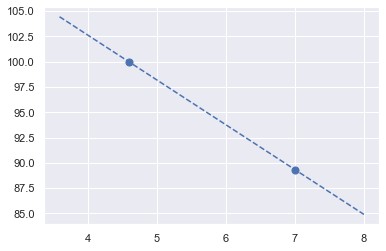

In [7]:
# Plotting the points 

plt.scatter(input2, output2, s = 50)

# Plotting your particular model/guessing function
x = np.linspace(np.min(input2)-1, np.max(input2)+1, 1000)
plt.plot(x, m2*x+b2, linestyle='dashed')

Suppose we have another person who has a neuroticism score of 6. Looking just at the plot above, what do you expect their performance score to be? 

**Your answer here**

Now let's compute the *predicted* performance score for this person:


In [8]:
new_person_2score = m2*6 + b2
print(new_person_2score)

[93.76660707]


We have their *actual* perfomance score; it is 75. Does this surprise you?   

**Your answer here**

### Starting with 4 points

Let's add a few more employees to our dataset and recompute the simple linear regression

In [9]:
# Selecting four employees
# This time select at random using random choice
np.random.seed(2022)
inds4 = np.random.choice(range(1000),4)

justfour = employee.iloc[inds4,:]
input4 = justfour[["neuroticism"]].to_numpy()
output4 = justfour[["performance"]].to_numpy()

# Set up the particulars for the linear regression
lm4 = linear_model.LinearRegression()

# Fit the linear regression to the data
model4 = lm4.fit(input4,output4)

# Extract the coefficients
m4 = lm4.coef_[0]
b4 = lm4.intercept_

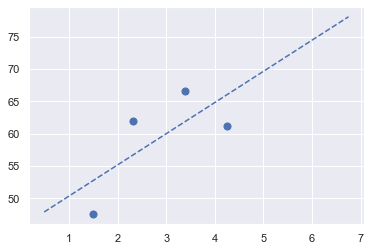

In [10]:
# Plotting the points 

plt.scatter(input4,output4, s = 50)

# Plotting your particular model/guessing function
x = np.linspace(np.min(input4)-1, np.max(input4)+2.5, 1000)

plt.plot(x, m4*x+b4, linestyle='dashed')

Returning to our employee from before with a neuroticism score score of 6. Looking just at the plot above, what do you expect their performance score to be? 

**Your answer here**

Now let's compute the *predicted* performance score for this person:


In [11]:
new_person_4score = m4*6 + b4
print(new_person_4score)

[74.47620743]


We have their perfomance score; it is 75. Does this surprise you? 

**Your answer here**

### Comparing plots:

Before moving on, let's quickly compare these two lines resulting from two different subsets of employees:

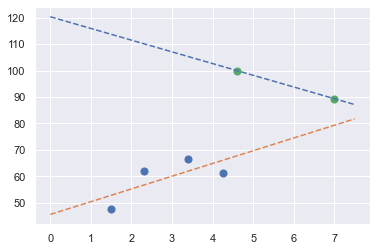

In [12]:
# Plotting the points 
plt.scatter(input4, output4, s = 50)
plt.scatter(input2,output2, s=50, c = "g")

# Plotting your particular model/guessing functions
x = np.linspace(0, 7.5, 1000)
plt.plot(x, m2*x+b2, linestyle='dashed')
plt.plot(x, m4*x+b4, linestyle='dashed')

In [24]:
print(m2, b2, m4, b4)

[-4.43028091] [120.34829251] [4.82020855] [45.55495611]


What do you notice about these two lines? Does one make more "sense" than the other?   

Jot down a few notes. (Spend no more than 90 seconds thinking about this. We'll return to these ideas later.) 

## Supervised learning as a procedure

This sequence of steps follows the general process of **supervised** learning:   

0. Decide what task we are doing (classification or prediction) and select the algorithm/model we want to use   
1. Using part of the available data with their given outputs, fit algorithm/model
2. Check the model against "new" data (ie. the data that we did **not** use in the fitting). Use the "truth" to evaluate the "goodness" of the model. 

In the example in this lab, the above general procedure is applied to this specific situation as follows:   

0. Decided to do _prediction_ using _simple linear regression_   
1. Used the neuroticism score (as input) and the performance score (as output) of two points to determine the $m$ and the $b$ for the simple linear regression (with the final formulation: `performance = m * neuroticism + b`)
3. Made a prediction for a new person using only their input value and checked it against the true performance score. 


### Supervision

The _supervision_ occurs in the Step 1, where we use the "answers" to help us set where the line should be. Without these answers/output/response variables, we could place a line in an number of places, but those placements would have nearly nothing to do with our goal of _predicting_ the performance score from the _whatever_ score. In prediction, we are seeking a model that is directly tied to _answer_ and as such we must use it as part of fitting the model. 

### Comparing Supervised and Unsupervised Learning (in steps) 
How does this sequence compare or contrast to _unsupervised learning_ where there is no supervision. Below are two outlines, one for general unsupervised learning and one for a particular $k$-means example. Be sure to note where the supervision is _lacking_ in the general case, and then pick one such example to make the list of general steps more concrete. 

This sequence of steps for unsupervised learning follows the general process we observed for supervised learning above.

0. Decide what task we are doing (**clustering/grouping** or **dimension reduction**) and select the algorithm/model we want to use
1. (no supervision)
2. Use **all** the data as input, and fit algorithm/model
3. **Evaluating step** - we use something beyond our data, a metric of some kind

In our $k$-means examples, we did these steps as follows:

0. Clustering with $k$-means
1. (no supervision)
2. Use all data to fit $k$-means   
3. **evaluation step** - width of clusters, cluster separation 

Compare and contrast the steps for *supervised* and *unsupervised* machine learning

**Wait here for a group discussion**

## Evaluating Prediction Model

Let's get a better sense of what we are working with. Make one plot of all the data with the neuroticism scores on one axis and the performance scores on the other axis. Place both of your models on this figure. 

Which is better? Why? 

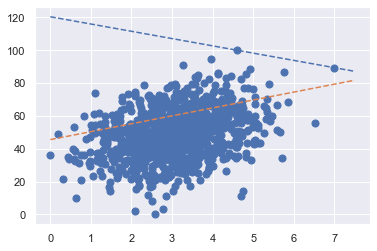

In [13]:
# Plot all the data with both lines drawn on top of them

neuro = employee[["neuroticism"]].to_numpy()
perform = employee[["performance"]].to_numpy()

# Plotting ALL of the data 
plt.scatter(neuro,perform, s = 50)


# Plotting your particular model/guessing functions
x = np.linspace(0, 7.5, 1000)
plt.plot(x, m2*x + b2, linestyle='dashed')
plt.plot(x, m4*x + b4, linestyle='dashed')

(Spot for your notes here)

### Using `predict()` to evaluate the model

It would be nice if we could have a number of how "good" or "bad" our predictions are. 

Let's see what predictions our first model `lm2` would make for all employees (except the two used to build the model). 

We begin by creating a list of all the employees, except the two selected to build the model. We call this `emp_testset`. Then we use `predict()` for `lm2` on this subset to predict performance scores for all employees in `emp_testset`.

In [14]:
# Remove the indices associated with the two employees use to 
# create lm2 from our list of all employees
test_inds = list(set(list(range(1000))) - set(inds2))

# Create the subset of all employees except those two
emp_testset = employee.iloc[test_inds,:]
#emp_testset = emp_testset[["neuroticism","performance"]].to_numpy()

# Separate the data into the "inputs" (neuro) and output (performance)
neuro = emp_testset[["neuroticism"]].to_numpy()
perform = emp_testset[["performance"]].to_numpy()

# Find the predicted values for performance
predict2 = lm2.predict(neuro)

To get a sense of our results, create a scatter plot of the true performance scores against the predicted scores:

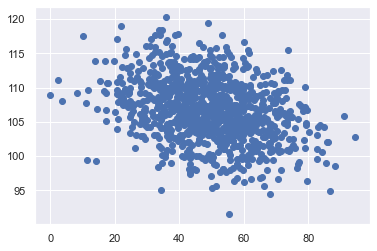

In [15]:
plt.scatter(perform, predict2)

What a mess! This plot does not feel so informative. 


Instead let's make a plot of the neuroticism scores with the ground truth scores as `x` and add a second plot on top of the neuroticism scores with the predictions in orange. This should give us a better visual for how well our line predicts the true values. 

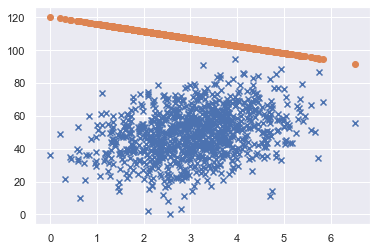

In [16]:
# Plot original data
plt.scatter(neuro, perform, marker = "x")

# Plot predictions from lm2
plt.scatter(neuro, predict2)

This looks really off! But by how much? One method is to get a notion of how off each guess is from the ground truth on average. 

In [17]:
# Let's start by computing the error for each individual person: 
error2_by_emp = np.abs(predict2 - perform)**2

# Now let's add up all the errors for a notion of the total error: 
total_error2 = np.sum(error2_by_emp)

# Find the average of how off our predictions are:
average_mistake2 = total_error2/(1000-2)


# Alternatively, we can directly find the average error using MEAN:
# average_mistake2 = np.mean(np.abs(predict2 - perform)**2)

In [18]:
print(average_mistake2)

3573.378903576511


Let's repeat the above process for our second model. Is this a better model? 

In [19]:
# Remove the indices associated with the two employees use to 
# create lm2 from our list of all employees
test_inds = list(set(list(range(1000))) - set(inds4))

# Create the subset of all employees except those two
emp_testset = employee.iloc[test_inds,:]
#emp_testset = emp_testset[["neuroticism","performance"]].to_numpy()

# Separate the data into the "inputs" (neuro) and output (performance)
neuro = emp_testset[["neuroticism"]].to_numpy()
perform = emp_testset[["performance"]].to_numpy()

# Find the predicted values for performance
predict4 = lm4.predict(neuro)

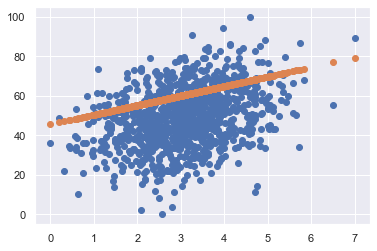

In [20]:
# Make a plot comparing neuroticism scores with the ground truth scores 
# and the neuroticism scores with the predictions. 

# Plot original data
plt.scatter(neuro, perform)

# Plot predictions from lm4
plt.scatter(neuro, predict4)

In [21]:
# Using whatever method you prefer, compute the average 
# error for the predicted values for perform
# Let's start by computing the error for each individual person: 
error4_by_emp = np.abs(predict4 - perform)**2

# Now let's add up all the errors for a notion of the total error: 
total_error4 = np.sum(error4_by_emp)

# Find the average of how off our predictions are:
average_mistake4 = total_error4/(1000-4)


# Alternatively, we can directly find the average error using MEAN:
# average_mistake2 = np.mean(np.abs(predict2 - perform)**2)

In [22]:
average_mistake4

315.9181370386279

### Training vs. Testing

Notice that when we did our predictions, we only tested on the data points that we didn't use in our creation of the model. This is because the goal of supervised learning is to build a model that will work generally for your data and your context based on a few data points with "answers" included. The phase that uses just a few data points is called the **training** phase and the phase that compares the model's predictions to the ground truth is called the **testing** phase. 

In fact, we compute two kinds errors for each model: one in training and one in testing. We will talk more about training and testing later in the semester, and how specifically these training and testing computations impact the choices we make regarding data. 

Compute the **training error** for both models (i.e. the average difference between the predictions for the training data and the ground truth). 

In [23]:
# Use predict() to get the predicted values for the input 
# values for the training set, ie. the employees that were
# part of creating the model
pred2 = lm2.predict(input2)

# Compute the average of the difference between the 
# predictions and the real output (ie. from the data)
te2 = np.mean(np.abs(pred2 - output2)**2)

# Repeat the above process for lm4:
pred4 = 
te4 = 

print("training error for lm2", te2, "\n")
print("training error for lm4", te4)

SyntaxError: invalid syntax (<ipython-input-23-db725eb7cf14>, line 11)

Based on your 2 training computations and your two testing computations. Which model is better?

### Final Thoughts

To finish up this lab, create a plot for the data with three lines:
1. The first should represent the direction and position of the first principal component
2. The second is the linear regression (using all the data for training) with performance as the output
3. The third is the linear regression (using all the data for training) with neuroticism as the output

Share your plot in a post on **#lab08_submission** channel on slack and share something that you find odd you about your plot.  

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab8**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### References consulted
0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. _Python Machine Learning_
2. [Simple and Multiple Linear Regression in Python](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9)
3. [Simple Line Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)
3. [Simpson’s Paradox: Two HR examples with R code.](https://paulvanderlaken.com/2017/09/27/simpsons-paradox-two-hr-examples-with-r-code/)
4. [Simpson’s Paradox data](https://itsalocke.com/datasaurus/reference/simpsons_paradox)
5. [Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing](https://www.autodeskresearch.com/publications/samestats) <= making dino data
6. [Simpson’s Paradox and Interpreting Data](https://towardsdatascience.com/simpsons-paradox-and-interpreting-data-6a0443516765)
7. [list difference](https://stackoverflow.com/questions/6486450/python-compute-list-difference)
8. [Visually differentiating PCA and Linear Regression](https://shankarmsy.github.io/posts/pca-vs-lr.html)


##### Note
There are two other notebooks in this directory. One shows you how I created the fake data and the second is my scratch work for the second half of the lab. I am including both here so that you can see what happens "behind the scenes" if you choose. Neither notebook are as well annotated as this one, nor are they ones that I would call "final drafts." They are mostly notes that I used to create the notebook that you use for the lab. 